<p><font size="6"><b>Scientific Python essentials</b></font></p>

> *Introduction to GIS scripting*  
> *May, 2017*

> *© 2017, Stijn Van Hoey (<mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*


## Introduction

There is a large variety of packages available in Python to support reasearch analysis. In this notebook, we will focus on two fundamental packages within most scientific applications:

1. Numpy
1. Pandas

Furthermore, if plotting is required, this will be done with matplotlib package (we only use `plot` and `imshow` in this tutorial):

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Numpy

### Introduction

NumPy is the fundamental package for **scientific computing** with Python.

Information for the *freaks*:
    
* a powerful N-dimensional array/vector/matrix object
* sophisticated (broadcasting) functions
* function implementation in C/Fortran assuring good performance if vectorized
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

*In short*: Numpy is the Python package to do **fast** calculations!

It is a community agreement to import the numpy package with the prefix `np` to identify the usage of numpy functions. Use the `CTRL` + `SHIFT` option to check the available functions of numpy:

In [2]:
import numpy as np

In [3]:
# np. # explore the namespace

Numpy provides many mathematical functions, which operate element-wise on a so-called **`numpy.ndarray`** data type (in short: `array`).

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> There is a lot of functionality in Numpy. Knowing **how to find a specific function** is more important than knowing all functions...
    </ul>
</div>

You were looking for some function to derive quantiles of an array...

In [4]:
np.lookfor("quantile")

Search results for 'quantile'
-----------------------------
numpy.percentile
    Compute the qth percentile of the data along the specified axis.
numpy.nanpercentile
    Compute the qth percentile of the data along the specified axis,


Different methods do read the manual:

In [5]:
#?np.percentile

In [6]:
# help(np.percentile) 

In [7]:
# use SHIFT + TAB

### Showcases

* You like to play boardgames, but you want to better know you're chances of rolling a certain combination (sum) with 2 dices:

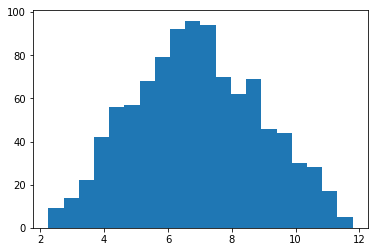

In [8]:
throws = 1000 # number of rolls with the dices

stone1 = np.random.uniform(1, 6, throws) # outcome of throws with dice 1
stone2 = np.random.uniform(1, 6, throws) # outcome of throws with dice 2
total = stone1 + stone2  # sum of each outcome
histogram = plt.hist(total, bins=20) # plot as histogram

* Consider a random 10x2 matrix representing cartesian coordinates (between 0 and 1), how to convert them to polar coordinates?

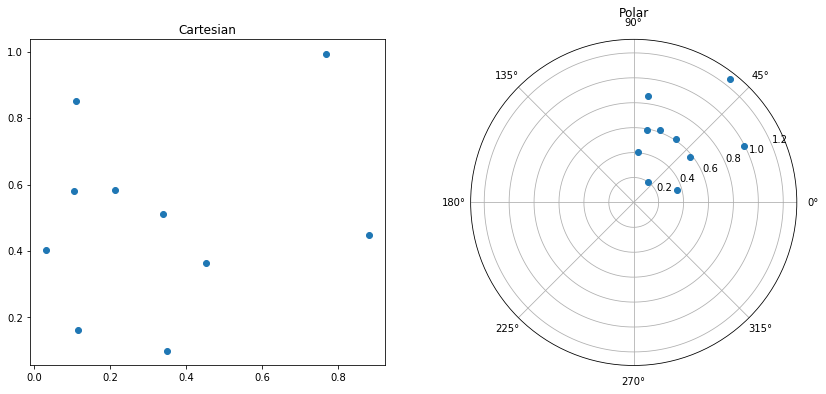

In [9]:
# random numbers (X, Y in 2 columns)
Z = np.random.random((10,2))
X, Y = Z[:,0], Z[:,1]

# Distance 
R = np.sqrt(X**2 + Y**2)
# Angle
T = np.arctan2(Y, X) # Array of angles in radians
Tdegree = T*180/(np.pi) # If you like degrees more

# NEXT PART (purely for illustration)
# plot the cartesian coordinates
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax1.plot(Z[:,0], Z[:,1], 'o')
ax1.set_title("Cartesian")
#plot the polar coorsidnates
ax2 = plt.subplot(122, polar=True)
ax2.plot(T, R, 'o')
ax2.set_title("Polar")

* Rescale the values of a given array to values in the range [0-1] and mark zero values are Nan:

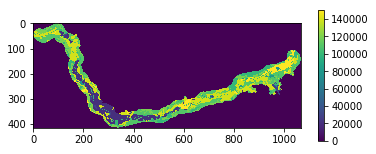

In [10]:
nete_bodem = np.load("../data/nete_bodem.npy")
plt.imshow(nete_bodem)
plt.colorbar(shrink=0.6)

In [11]:
nete_bodem_rescaled = (nete_bodem - nete_bodem.min())/(nete_bodem.max() - nete_bodem.min()) # rescale
nete_bodem_rescaled[nete_bodem_rescaled == 0.0] = np.nan  # assign Nan values to zero values

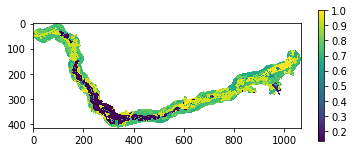

In [12]:
plt.imshow(nete_bodem_rescaled)
plt.colorbar(shrink=0.6)

(**Remark:** There is no GIS-component in the previous manipulation, these are pure element-wise operations on an array!)

### Creating numpy array

In [13]:
np.array([1, 1.5, 2, 2.5])  #np.array(anylist)

array([ 1. ,  1.5,  2. ,  2.5])

<div class="alert alert-warning">
    <b>R comparison:</b><br>
    <p>One could compare the numpy array to the R vector. It contains a single data type (character, float, integer) and operations are element-wise.</p>
</div>

Provide a range of values, with a begin, end and stepsize:

In [14]:
np.arange(5, 12, 2)

array([ 5,  7,  9, 11])

Provide a range of values, with a begin, end and number of values in between:

In [15]:
np.linspace(2, 13, 3)

array([  2. ,   7.5,  13. ])

Create empty arrays or arrays filled with ones:

In [16]:
np.zeros((5, 2)), np.ones(5)

(array([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]), array([ 1.,  1.,  1.,  1.,  1.]))

Request the `shape` or the `size` of the arrays:

In [17]:
np.zeros((5, 2)).shape, np.zeros((5, 2)).size

((5, 2), 10)

And creating random numbers:

In [18]:
np.random.rand(5,5)  # check with np.random. + TAB for sampling from other distributions!

array([[ 0.38438942,  0.97434155,  0.38502669,  0.15532264,  0.823198  ],
       [ 0.78587399,  0.27499523,  0.70757633,  0.47966322,  0.55844034],
       [ 0.4711012 ,  0.85971443,  0.92337492,  0.7120357 ,  0.58327473],
       [ 0.99297042,  0.29729801,  0.14433942,  0.97605846,  0.23636861],
       [ 0.05894808,  0.68050613,  0.70513088,  0.30843527,  0.06710415]])

Reading in from binary file:

In [19]:
nete_bodem = np.load("../data/nete_bodem.npy")

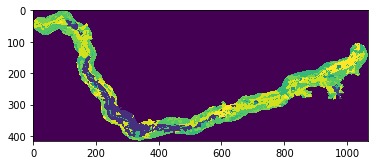

In [20]:
plt.imshow(nete_bodem)

Reading in from a **text**-file:

In [21]:
nete_bodem_subset = np.loadtxt("../data/nete_bodem_subset.out")

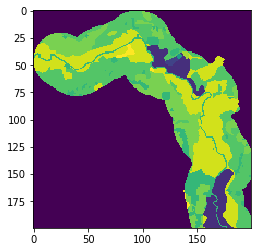

In [22]:
plt.imshow(nete_bodem_subset)

### Slicing (accessing values in arrays)

This i equivalent to the slicing of a `list`:

In [23]:
my_array = np.random.randint(2, 10, 10)
my_array

array([7, 2, 7, 2, 5, 4, 5, 6, 4, 2])

In [24]:
my_array[:5], my_array[4:], my_array[-2:]

(array([7, 2, 7, 2, 5]), array([5, 4, 5, 6, 4, 2]), array([4, 2]))

In [25]:
my_array[0:7:2]

array([7, 7, 5, 5])

In [26]:
sequence = np.arange(0, 11, 1)
sequence, sequence[::2], sequence[1::3], 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  2,  4,  6,  8, 10]),
 array([ 1,  4,  7, 10]))

Assign new values to items

In [27]:
my_array[:2] = 10
my_array

array([10, 10,  7,  2,  5,  4,  5,  6,  4,  2])

In [28]:
my_array = my_array.reshape(5, 2)
my_array

array([[10, 10],
       [ 7,  2],
       [ 5,  4],
       [ 5,  6],
       [ 4,  2]])

With multiple dimensions, we get the option of slice amongst these dimensions:

In [29]:
my_array[0, :]

array([10, 10])

### Aggregation calculations

In [30]:
my_array = np.random.randint(2, 10, 10)
my_array

array([2, 8, 9, 6, 4, 8, 4, 8, 7, 3])

In [31]:
print('Mean value is', np.mean(my_array))
print('Median value is',  np.median(my_array))
print('Std is', np.std(my_array))
print('Variance is', np.var(my_array))
print('Min is', my_array.min())
print('Element of minimum value is', my_array.argmin())
print('Max is', my_array.max())
print('Sum is', np.sum(my_array))
print('Prod', np.prod(my_array))
print('Unique values in this array are:', np.unique(my_array))
print('85% Percentile value is: ', np.percentile(my_array, 85))

Mean value is 5.9
Median value is 6.5
Std is 2.34307490277
Variance is 5.49
Min is 2
Element of minimum value is 0
Max is 9
Sum is 59
Prod 18579456
Unique values in this array are: [2 3 4 6 7 8 9]
85% Percentile value is:  8.0


In [32]:
my_other_array = np.random.randint(2, 10, 10).reshape(2, 5)
my_other_array

array([[4, 6, 4, 8, 2],
       [2, 3, 4, 7, 4]])

use the argument `axis` to define the ax to calculate a specific statistic:

In [33]:
my_other_array.max(), my_other_array.max(axis=1), my_other_array.max(axis=0)

(8, array([8, 7]), array([4, 6, 4, 8, 4]))

### Element-wise operations

In [34]:
my_array = np.random.randint(2, 10, 10)

In [35]:
my_array

array([2, 7, 9, 6, 6, 5, 9, 6, 5, 3])

In [36]:
print('Cumsum is', np.cumsum(my_array))
print('CumProd is', np.cumprod(my_array))
print('CumProd of 5 first elements is', np.cumprod(my_array)[4])

Cumsum is [ 2  9 18 24 30 35 44 50 55 58]
CumProd is [       2       14      126      756     4536    22680   204120  1224720
  6123600 18370800]
CumProd of 5 first elements is 4536


In [37]:
np.exp(my_array), np.sin(my_array)

(array([  7.38905610e+00,   1.09663316e+03,   8.10308393e+03,
          4.03428793e+02,   4.03428793e+02,   1.48413159e+02,
          8.10308393e+03,   4.03428793e+02,   1.48413159e+02,
          2.00855369e+01]),
 array([ 0.90929743,  0.6569866 ,  0.41211849, -0.2794155 , -0.2794155 ,
        -0.95892427,  0.41211849, -0.2794155 , -0.95892427,  0.14112001]))

In [38]:
my_array%3  # == 0

array([2, 1, 0, 0, 0, 2, 0, 0, 2, 0])

Using the numpy available function from the library or using the object method?

In [39]:
np.cumsum(my_array) == my_array.cumsum()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Check the documentation of both `np.cumsum()` and `my_array.cumsum()`. What is the difference?</li>
</ul>
</div>

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> `np.cumsum` operates a function from the numpy library with input an array, e.g. `my_array`
        <li> `my_array.cumsum()` is a <b>method</b> available to the object `my_array`
    </ul>
</div>

In [40]:
my_array.cumsum()

array([ 2,  9, 18, 24, 30, 35, 44, 50, 55, 58])

In [41]:
my_array.max(axis=0)

9

In [42]:
my_array * my_array  # element-wise

array([ 4, 49, 81, 36, 36, 25, 81, 36, 25,  9])

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> The operations do work on all elements of the array at the same time, you don't need a <strike>`for` loop<strike>
    </ul>
</div>

What is the added value of the numpy implementation compared to 'basic' python?

In [43]:
a_list = range(1000)
%timeit [i**2 for i in a_list]

344 µs ± 9.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
an_array = np.arange(1000)
%timeit an_array**2

1.31 µs ± 68.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Boolean indexing and filtering (!)

This is a fancy term for making selections based on a **condition**!

Let's start with an array that contains random values:

In [45]:
row_array = np.random.randint(1, 20, 10)
row_array

array([ 5,  7,  8, 15, 11, 16,  9,  3,  5, 10])

Conditions can be checked (*element-wise*):

In [46]:
row_array > 5

array([False,  True,  True,  True,  True,  True,  True, False, False,  True], dtype=bool)

In [47]:
boolean_mask = row_array > 5
boolean_mask

array([False,  True,  True,  True,  True,  True,  True, False, False,  True], dtype=bool)

You can use this as a filter to select elements of an array:

In [48]:
row_array[boolean_mask]

array([ 7,  8, 15, 11, 16,  9, 10])

or, also to change the values in the array corresponding to these conditions:

In [49]:
row_array[boolean_mask] = 20
row_array

array([ 5, 20, 20, 20, 20, 20, 20,  3,  5, 20])

in short - making the values equal to 20 now -20:

In [50]:
row_array[row_array == 20] = -20
row_array

array([  5, -20, -20, -20, -20, -20, -20,   3,   5, -20])

<div class="alert alert-warning">
    <b>R comparison:</b><br>
    <p>This is similar to conditional filtering in R on vectors...</p>
</div>

<div class="alert alert-danger">
    Understanding conditional selections and assignments is CRUCIAL!
</div>

This requires some practice...

In [51]:
AR = np.random.randint(0, 20, 15)
AR

array([ 5,  3, 12, 14, 11,  0,  8, 10, 16,  1, 13,  8,  8,  7, 16])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Count the number of values in AR that are larger than 10 (note: you can count with True = 1 and False = 0)</li>
</ul>
</div>

In [52]:
sum(AR > 10)

6

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Change all even numbers of `AR` into zero-values.</li>
</ul>
</div>

In [53]:
AR[AR%2 == 0] = 0
AR

array([ 5,  3,  0,  0, 11,  0,  0,  0,  0,  1, 13,  0,  0,  7,  0])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Change all even positions of matrix AR into 30 values</li>
</ul>
</div>

In [54]:
AR[1::2] = 30
AR

array([ 5, 30,  0, 30, 11, 30,  0, 30,  0, 30, 13, 30,  0, 30,  0])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Select all values above the 75th `percentile` of the following array AR2 ad take the square root of these values</li>
</ul>
</div>

In [55]:
AR2 = np.random.random(10)
AR2

array([ 0.2170166 ,  0.32711233,  0.1024719 ,  0.46837866,  0.73870644,
        0.23983147,  0.84006343,  0.27242343,  0.29360816,  0.32338526])

In [56]:
np.sqrt(AR2[AR2 > np.percentile(AR2, 75)])

array([ 0.68438196,  0.85948033,  0.91654974])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Convert all values -99. of the array AR3 into Nan-values (Note that Nan values can be provided in float arrays as `np.nan`)</li>
</ul>
</div>

In [57]:
AR3 = np.array([-99., 2., 3., 6., 8, -99., 7., 5., 6., -99.])

In [58]:
AR3[AR3 == -99.] = np.nan
AR3

array([ nan,   2.,   3.,   6.,   8.,  nan,   7.,   5.,   6.,  nan])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Get an overview of the unique values present in the array `nete_bodem_subset`</li>
</ul>
</div>

In [59]:
nete_bodem_subset = np.loadtxt("../data/nete_bodem_subset.out")

In [60]:
np.unique(nete_bodem_subset)

array([      0.,   20000.,   30000.,   80000.,  100000.,  110000.,
        120000.,  130000.,  140000.,  150000.])

<div class="alert alert-success">
    <b>EXERCISE</b>: 
<ul>
    <li>Reclassify the values of the array `nete_bodem_subset` (binary filter):</li>
        <ul>
            <li>values lower than or equal to 100000 should be 0</li>
            <li>values higher than 100000 should be 1</li>
        </ul>
</ul>
</div>

In [61]:
nete_bodem_subset = np.loadtxt("../data/nete_bodem_subset.out")

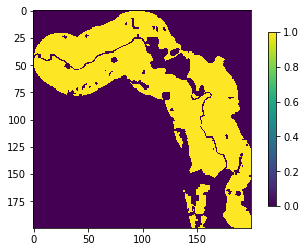

In [62]:
nete_bodem_subset[nete_bodem_subset <= 100000.] = 0
nete_bodem_subset[nete_bodem_subset > 100000.] = 1

plt.imshow(nete_bodem_subset)
plt.colorbar(shrink=0.8)

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> No need to retain everything, but have the reflex to search in the documentation (online docs, SHIFT-TAB, help(), lookfor())!!
        <li> Conditional selections (boolean indexing) is crucial!
    </ul>
</div>

This is just touching the surface of Numpy in order to proceed to the next phase (Pandas and GeoPandas)... 

More extended material on Numpy is available online:

* http://www.scipy-lectures.org/intro/numpy/index.html (great resource to start with scientifi python!)
* https://github.com/stijnvanhoey/course_python_introduction/blob/master/scientific/numpy.ipynb (more extended version of the material covered in this tutorial)

## Pandas: data analysis in Python

For data-intensive work in Python, the Pandas library has become essential. Pandas originally meant **Pan**el **Da**ta, though many users probably don't know that.

What is pandas?

* Pandas can be thought of as NumPy **arrays with labels for rows and columns**, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as **R's data.frame** in Python.
* Powerful for working with missing data, working with **time series** data, for reading and writing your data, for reshaping, grouping, merging your data,...

Pandas documentation is available on: http://pandas.pydata.org/pandas-docs/stable/

In [63]:
# community agreement: import as pd
import pandas as pd

Reading in data...

In [64]:
#TODO

### Series and DataFrames

### Slicing and boolean indexing

### Aggregation and element-wise calculations

### Combining DataFrames

`merge`

### Pandas is great with time series (informative)

Acknowledgments and Material

* J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/
* http://scipy-lectures.github.io/intro/numpy/index.html
* http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html